In [3]:
import numpy as np

X=np.load('detroit.npy')
vars = ["UEMP", "MAN", "LIC", "GR", "NMAN", "GOV", "HE"]

matrix = []
    
vector = []
for i in range(len(X)):
    vector.append(X[i][-1])
vector = np.array(vector)

## Format array
for k in range(1,8):
    temp = []
    for i in range(len(X)):
        row = []
        row.append(X[i][0])
        row.append(X[i][8])
        row.append(X[i][k])
        temp.append(row)
    matrix.append(temp)

errors = []
for i in range(7):
    X = np.array(matrix[i]) ### Let x be the design matrix

    phi = [0.0, 0.0, 0.0]
    t = 0.0
    for j in range(len(X)):
        phi += X[j]
        t += vector[j]
    ## Get the average
    phi /= len(X) 
    t /= len(vector)

    weights = ((np.linalg.inv((X.T).dot(X))).dot(X.T)).dot(vector)

    result = 0.0
    for j in range(len(phi)):
        result += weights[j]*phi[j]
    w0 = t - result

    loss = 0.0
    for n in range(len(X)):
        third = (weights.T).dot(X[n])
        loss += (vector[n] - w0 - third) ** 2
    loss /= 2
    errors.append(loss)

## Print the column with the least errors
best = errors.index(min(errors))
print("The third variable is " + vars[best])

The third variable is GR


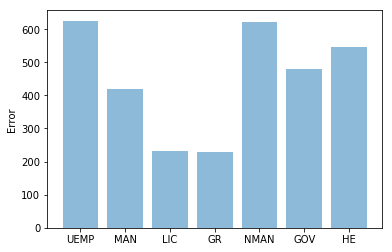

In [5]:
import matplotlib.pyplot as plt
import numpy as np
y_pos = np.arange(len(vars))
plt.bar(y_pos, errors, align='center', alpha=0.5)
plt.xticks(y_pos, vars)
plt.ylabel('Error')
plt.show()